### **Dimensionality Reduction using PCA and Clustering using k-Means on Misinformation Claims**

Clustering and dimensionality reduction techniques can be valuable in analyzing patterns and themes within misinformation data.
1. Clustering
Clustering involves grouping similar data points together, which helps in identifying underlying patterns or themes in misinformation claims. Here’s how clustering can be useful for misinformation analysis:

Identifying Themes and Topics: Clustering algorithms like K-Means, DBSCAN, or Hierarchical Clustering can group claims based on shared themes or linguistic similarities. For instance, one cluster might contain misinformation about elections, another about health, and so on. This can help in analyzing the prevalence of different misinformation topics over time.

2. Dimensionality Reduction
Dimensionality reduction helps simplify high-dimensional data (e.g., text data represented as word embeddings or TF-IDF vectors) by projecting it into a lower-dimensional space, making it easier to visualize and interpret.

Improving Clustering Performance: Reducing the dimensionality of the data can improve the performance and interpretability of clustering algorithms. High-dimensional data often has noise, which can interfere with clustering. Techniques like PCA can help remove noise and extract the most relevant features, leading to clearer clustering results.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
data = pd.read_csv('boomlive_data_cleaned.csv')

In [3]:
data.head(3)

,Category,Link,Heading,Sub_heading,Author,Date,Claim,Fact_check,Claim_summary,Claimed_by,Fact_check_summary,Links,Year,Month
0,fact check,https://www.boomlive.in/fact-check/awami-leagu...,bangladeshi actor being heckled on video false...,"according to local reports, mishti subas was c...",Archis Chowdhury,2024-10-10 14:16:00,video shows an american woman being heckled in...,boom identified the woman as bangladeshi actor...,video shows an american woman being heckled in...,social media users,false,"['https://archive.is/607Xw', 'https://www.face...",2024,10
1,fast check,https://www.boomlive.in/fast-check/morphed-pho...,morphed photo falsely shared as patanjali sell...,boom found that the viral image was morphed fr...,Yangchula Bhutia,2024-10-09 13:33:00,an image showing a beef biryani spice mix with...,boom found that the viral image claiming patan...,a viral image claims that patanjali manufactur...,facebook,false,NaN,2024,10
2,fact check,https://www.boomlive.in/fact-check/video-of-ma...,video of man killed by cousins in bangladesh f...,boom found that the deceased man's name is han...,Tausif Akbar,2024-10-08 18:36:00,video shows a hindu man killed by slitting his...,the incident happened because of personal enmi...,video shows body of a hindu man killed by slit...,"facebook users, x users",false,[],2024,10


### Lets first work on 2024 data 

In [4]:
# extract 2024 data
data_2024 = data[data['Year'] == 2024]

In [5]:
# shape of the data
data_2024.shape

(460, 14)

**1. Data Preprpcessing and Vectorization**

In [6]:
# remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# extract the claims
claims = data_2024['Claim']

# drop NaN values
claims = claims.dropna()


# Custom stopwords specific to misinformation data
custom_stopwords = {'claim', 'false', 'video', 'social', 'image', 'media', 'online', 'showing', 'shows', 'show', 'viral',
                    'share', 'shared'}
all_stopwords = stop_words.union(custom_stopwords)

# Sample data
claims = claims.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))


In [8]:
claims.head()

0     american woman heckled bangladesh wearing hijab.
1    beef biryani spice mix patanjali branding circ...
2    hindu man killed slitting throat front everyon...
3    tv actress lebanon slaps maulvi making abusive...
4    palestine’s foreign minister addressing falsel...
Name: Claim, dtype: object

C:\Users\prita\AppData\Local\Temp\ipykernel_17968\1167946507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data_2024, palette='coolwarm')


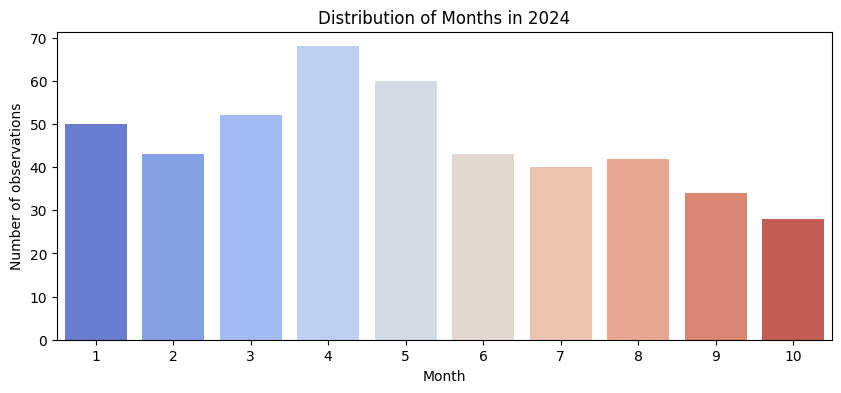

In [9]:
# histogram of the Month column using seaborn of year 2024
plt.figure(figsize=(10, 4))
sns.countplot(x='Month', data=data_2024, palette='coolwarm')
plt.title('Distribution of Months in 2024')
plt.xlabel('Month')
plt.ylabel('Number of observations')
plt.show()

In [10]:
## lemmitization and stemming
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Lemmatization
lemmatizer = WordNetLemmatizer()
claims = claims.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
print(claims.head())

# tokenize the claims using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(claims)

print(X.shape)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0     american woman heckled bangladesh wearing hijab.
1    beef biryani spice mix patanjali branding circ...
2    hindu man killed slitting throat front everyon...
3    tv actress lebanon slap maulvi making abusive ...
4    palestine’s foreign minister addressing falsel...
Name: Claim, dtype: object
(452, 3312)


**2. Dimensionality Reduction using PCA**

In [11]:
import numpy as np
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(X.toarray())

PCA()

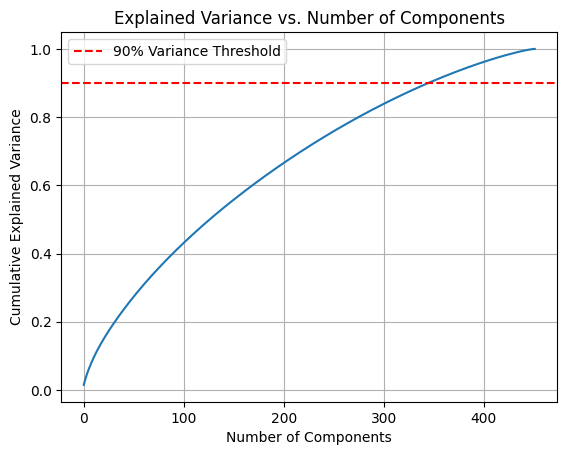

In [13]:
# Plot explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [14]:

# Find optimal number of components for 90% variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Optimal number of components for 90% variance: {n_components}")

Optimal number of components for 90% variance: 346


The plot shows the cumulative explained variance against the number of principal components in a PCA analysis. The y-axis represents the cumulative proportion of variance explained by adding each successive principal component. The goal of PCA is to capture as much variance (information) as possible with as few components as possible.

In [15]:
# Apply PCA with optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X.toarray())

In [16]:
X_pca.shape

(452, 346)

**3. Elbow method to decide number of clusters**

In [17]:
# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

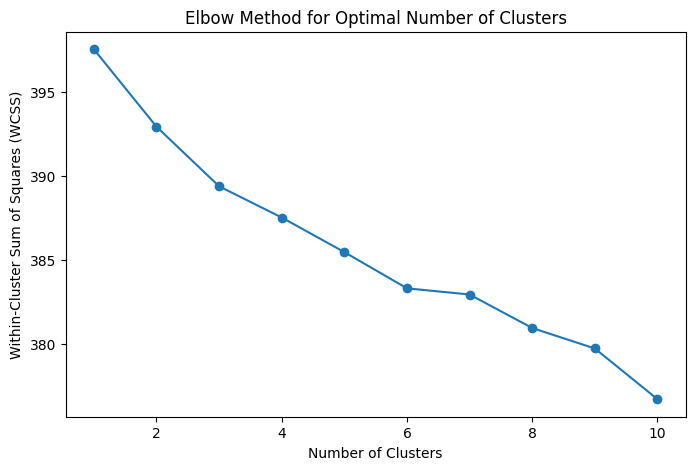

In [18]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [19]:
# Fit KMeans with the optimal number of clusters 
optimal_clusters = 4  # Replace with the number found from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [20]:
# Add cluster labels to the original data i.e., claims
# first claims to dataframe
claims_df = pd.DataFrame(claims)

# add clusters to claims dataframe
claims_df['Cluster'] = clusters

# Display the first few rows of the data
claims_df.head()

,Claim,Cluster
0,american woman heckled bangladesh wearing hijab.,2
1,beef biryani spice mix patanjali branding circ...,2
2,hindu man killed slitting throat front everyon...,2
3,tv actress lebanon slap maulvi making abusive ...,2
4,palestine’s foreign minister addressing falsel...,1


C:\Users\prita\AppData\Local\Temp\ipykernel_17968\3913653007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=claims_df, palette='coolwarm')


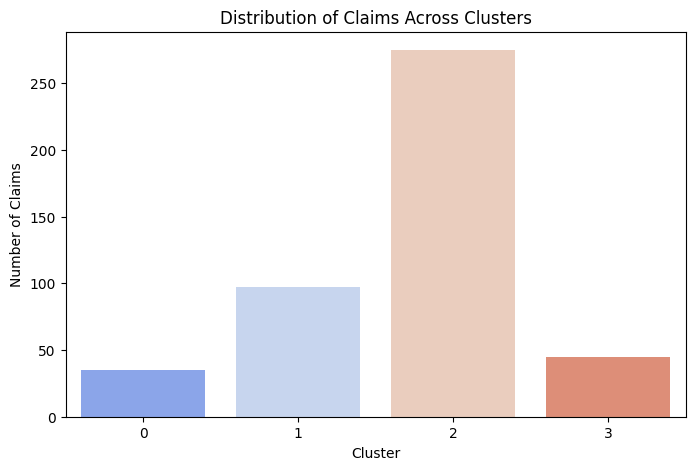

In [21]:
# Count the number of claims in each cluster
cluster_counts = claims_df['Cluster'].value_counts().sort_index()
cluster_counts

# Visualize the distribution of claims across clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=claims_df, palette='coolwarm')
plt.title('Distribution of Claims Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Claims')
plt.show()

**4. Word clouds to analyze the themes of the clusters**

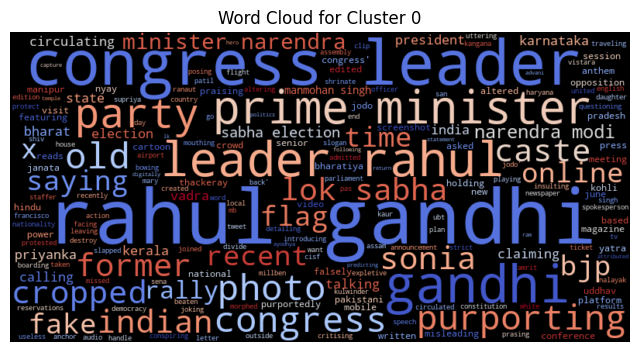

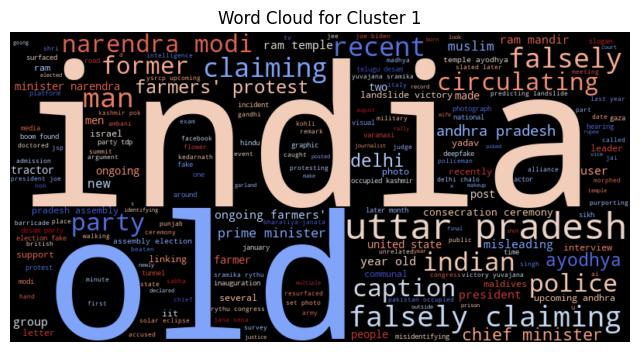

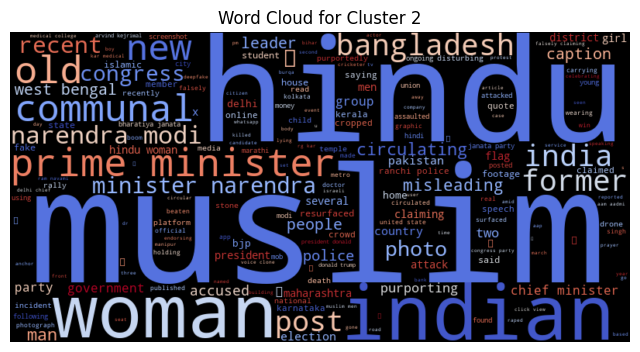

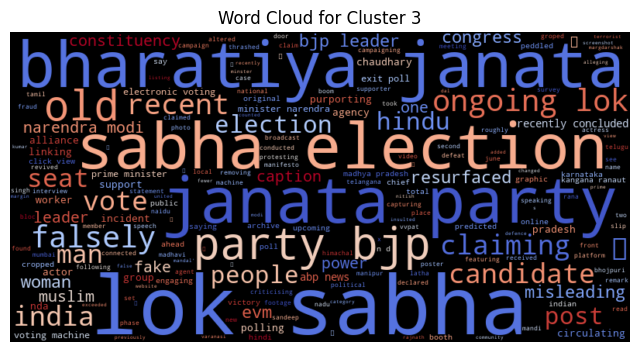

In [22]:
# word cloud for each cluster
from wordcloud import WordCloud

# Create a word cloud for each cluster
for i in range(optimal_clusters):
    cluster_text = " ".join(claims_df[claims_df['Cluster'] == i]['Claim'])

    # remove stopwords
    cluster_text = " ".join([word for word in cluster_text.split() if word not in all_stopwords])
    wordcloud = WordCloud(
    background_color="black",  # No background color for transparency
    mode="RGBA",            # Use RGBA mode for transparency
    colormap="coolwarm",      # Color scheme similar to your example
    width=800,              # Adjust width and height as needed
    height=400,
    random_state=42,        # For reproducibility
    prefer_horizontal=1.0   # To give more horizontal alignment of words
).generate(cluster_text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.axis('off')
    plt.show()

**Interpretation of WordClouds**

**Cluster 0:** This cluster's word cloud prominently features terms like "congress," "leader," "rahul gandhi," "prime minister," "party," and "minister." This indicates that Cluster 0 is primarily focused on political misinformation concerning major political figures and parties in India, particularly around Rahul Gandhi,and the Congress party. The frequent mention of terms like "flag," "cropped," "photo," and "purporting" suggests that misinformation related to manipulated images or edited media content is prevalent in this cluster.

**Cluster 1:** Cluster 1 suggests that misinformation in this cluster is location specific, political-social issues and false claims. Terms like "Uttar Pradesh," "Delhi," and "Andhra Pradesh" indicate that much of the misinformation in this cluster is geographically focused within India. The presence of words like "farmers," "protest," and "narendra modi" suggests a connection to politically sensitive topics. For example, the cluster may contain misinformation related to farmers' protests, which have been a major socio-political issue in India.

**Cluster 2:** In Cluster 2, words like "hindu," "muslim," "indian," "communal," and "bangladesh" dominate, alongside terms such as "woman," "post," and "accused." This cluster likely represents misinformation centered around communal or religious tensions, with a focus on Hindu-Muslim dynamics and events or incidents in neighboring countries like Bangladesh. The terms "prime minister," "police," and "misleading" suggest this misinformation cluster includes politically sensitive incidents that involve law enforcement or government responses, potentially with a communal angle.

**Cluster 3:** Cluster 3 frequently includes terms such as "bhartiya janta party," "lok sabha," "election," and "party," pointing towards misinformation linked to elections and political campaigning, specifically around the Bharatiya Janata Party (BJP) and the Lok Sabha. This indicates that Cluster 3 could be themed around election-related misinformation, perhaps concerning false claims or manipulated narratives to influence public opinion during elections.

### **Lets work on August data as we know which events happened**
**Adding prior Knowledge to see if that helps to find the clusters**

In [23]:
# get the August data
august_data = data_2024[data_2024['Month'] == 8]

august_data.head(3)

print(august_data.shape)

(42, 14)


In [24]:
# extract the claims
august_claims = august_data['Claim']

# drop NaN values
august_claims = august_claims.dropna()

# Sample data
august_claims = august_claims.apply(lambda x: " ".join([word for word in x.lower().split() if word not in all_stopwords]))

# Lemmatization
august_claims = august_claims.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
print(august_claims.head())

# tokenize the claims using TfidfVectorizer
X_august = vectorizer.transform(august_claims)

print(X_august.shape)


48    purportedly three muslim child india vandalisi...
49             rss march haryana 2024 assembly election
50    post whatsapp forward falsely police launched ...
51    individual cutting cake presence former princi...
52    posted bjp haryana's official handle congress ...
Name: Claim, dtype: object
(41, 3312)


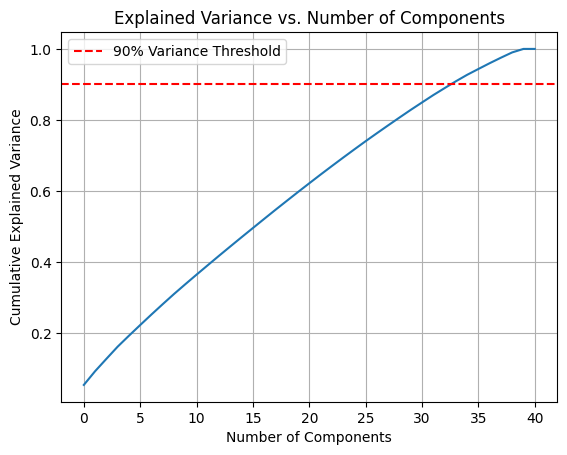

In [25]:
# Apply PCA and identify the optimal number of components
pca_august = PCA()
pca_august.fit(X_august.toarray())

# Plot explained variance
cumulative_variance_august = np.cumsum(pca_august.explained_variance_ratio_)
plt.plot(cumulative_variance_august)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Find optimal number of components for 90% variance
n_components_august = np.argmax(cumulative_variance_august >= 0.9) + 1
print(f"Optimal number of components for 90% variance: {n_components_august}")

Optimal number of components for 90% variance: 34


In [27]:
# Apply PCA with optimal number of components
pca_august = PCA(n_components=n_components_august)
X_august_pca = pca_august.fit_transform(X_august.toarray())

X_august_pca.shape

(41, 34)

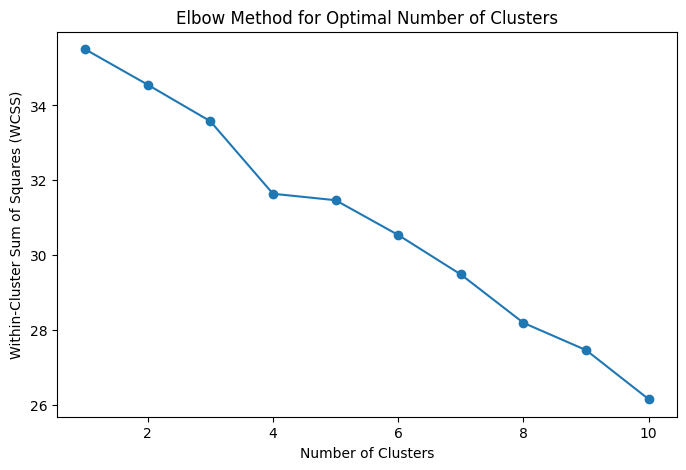

In [28]:
# Determine optimal number of clusters using the elbow method
wcss_august = []
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans_august = KMeans(n_clusters=i, random_state=42)
    kmeans_august.fit(X_august_pca)
    wcss_august.append(kmeans_august.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_august, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [29]:
# Fit KMeans with the optimal number of clusters
optimal_clusters_august = 4  # Replace with the number found from the elbow plot
kmeans_august = KMeans(n_clusters=optimal_clusters_august, random_state=42)
clusters_august = kmeans_august.fit_predict(X_august_pca)


In [30]:
# Add cluster labels to the original data i.e., claims
# first claims to dataframe
august_claims_df = pd.DataFrame(august_claims)

# add clusters to claims dataframe
august_claims_df['Cluster'] = clusters_august

# Display the first few rows of the data
august_claims_df.head()

,Claim,Cluster
48,purportedly three muslim child india vandalisi...,1
49,rss march haryana 2024 assembly election,1
50,post whatsapp forward falsely police launched ...,2
51,individual cutting cake presence former princi...,1
52,posted bjp haryana's official handle congress ...,1


C:\Users\prita\AppData\Local\Temp\ipykernel_17968\1897301268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=august_claims_df, palette='coolwarm')


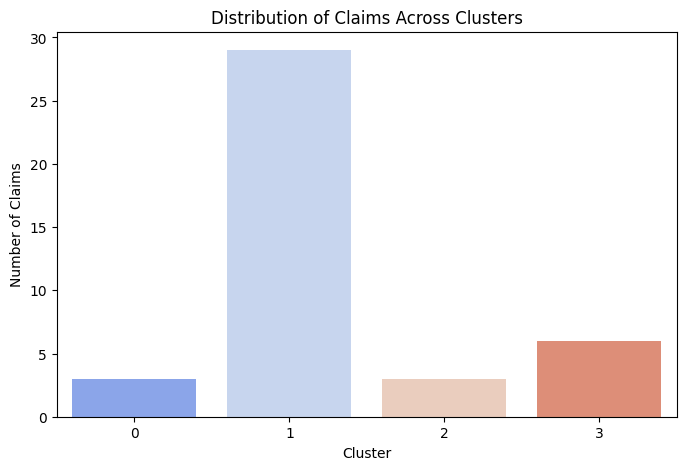

In [31]:
# Visualize the distribution of claims across clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=august_claims_df, palette='coolwarm')
plt.title('Distribution of Claims Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Claims')
plt.show()


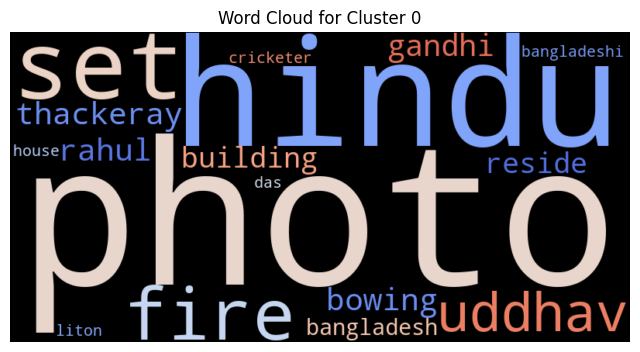

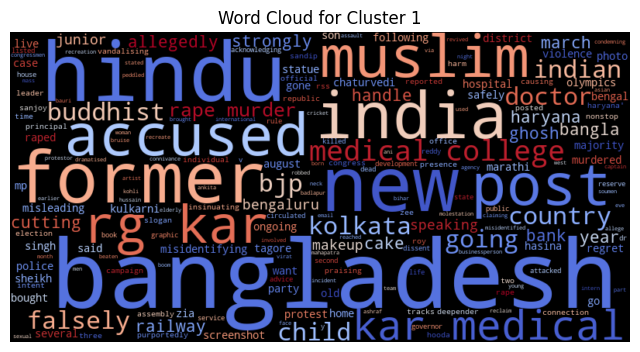

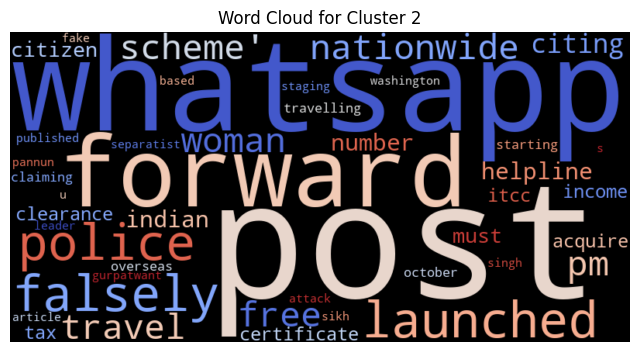

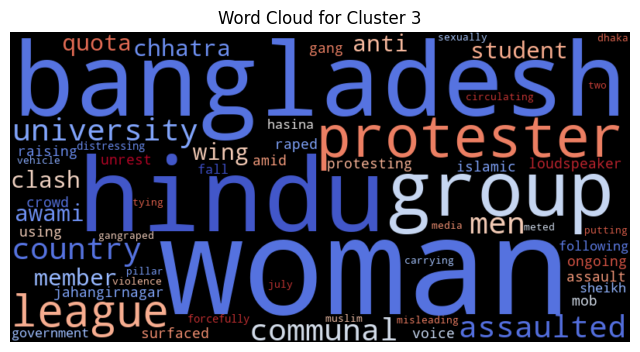

In [32]:
# Create a word cloud for each cluster

for i in range(optimal_clusters_august):
    cluster_text = " ".join(august_claims_df[august_claims_df['Cluster'] == i]['Claim'])

    # remove stopwords
    cluster_text = " ".join([word for word in cluster_text.split() if word not in all_stopwords])
    wordcloud = WordCloud(
    background_color="black",  # No background color for transparency
    mode="RGBA",            # Use RGBA mode for transparency
    colormap="coolwarm",      # Color scheme similar to your example
    width=800,              # Adjust width and height as needed
    height=400,
    random_state=42,        # For reproducibility
    prefer_horizontal=1.0   # To give more horizontal alignment of words
).generate(cluster_text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.axis('off')
    plt.show()

**Interpretation of cluster's wordclouds**

**Cluster 0:** This cluster seems to focus on misinformation involving Hindu communities and visual content (e.g., "photo") that may depict violent incidents like buildings being set on fire. The mentions of names like "Uddhav" and "Gandhi" suggest political figures may also be involved in some narratives.

**Cluster 1:** This cluster appears to center on cross-border religious tensions between Hindu and Muslim communities, often involving Bangladesh and India. Additionally, terms like "rg kar," "medical," and "accused" suggest healthcare-related misinformation, possibly surrounding incidents at medical institutions in Kolkata.

**Cluter 2:** This cluster is dominated by terms related to WhatsApp forwards and misleading schemes. Misinformation in this group might involve widely circulated posts about false schemes or benefits, often claiming to be official announcements from the government or police.

**Cluster 3:**  This cluster focuses on communal violence and protests in Bangladesh, with a specific emphasis on incidents involving Hindu women and student groups (e.g., "university," "league"). The terms indicate narratives around assaults and communal unrest, possibly involving groups like the Awami League in Bangladesh.

These clusters capture distinct themes of misinformation, ranging from communal tensions and political narratives to fraudulent schemes on social media. Each cluster reflects targeted misinformation designed to provoke strong reactions by focusing on sensitive topics such as religion, politics, and public welfare.

In [36]:
# list the claims of cluster 0
pd.set_option('display.max_colwidth', None)
august_claims_df[august_claims_df['Cluster'] == 0]['Claim']

63                      photo uddhav thackeray bowing rahul gandhi
66                       building hindu reside set fire bangladesh
83    photo hindu bangladeshi cricketer liton das's house set fire
Name: Claim, dtype: object

In [35]:
# list the claims of cluster 2
# dont truncate the output
pd.set_option('display.max_colwidth', None)
august_claims_df[august_claims_df['Cluster'] == 2]['Claim']

50     post whatsapp forward falsely police launched nationwide 'free travel scheme' woman 10 pm 6 am, citing helpline number 1091 7837018555.
56    whatsapp forward claim indian citizen must acquire income tax clearance certificate (itcc) travelling overseas starting october 1, 2024.
57              post claiming washington post published article u.s.-based sikh separatist leader gurpatwant singh pannun staging attack fake.
Name: Claim, dtype: object

In [37]:
# list the claims of cluster 3
# dont truncate the output
pd.set_option('display.max_colwidth', None)
august_claims_df[august_claims_df['Cluster'] == 3]['Claim']

65    clash bangladesh's anti-quota protester member chhatra league, student wing awami league, jahangirnagar university surfaced claim hindu woman gang-raped "an islamic mob"amid ongoing unrest country.
68                                                   woman crowd protester raising voice using loudspeaker hindu woman bangladesh protesting assault hindu country following fall sheikh hasina government.
74                                                                                        distressing group men forcefully carrying woman putting vehicle bangladesh circulating misleading communal media.
75                                                                                                                                                                        hindu woman assaulted bangladesh.
76                                                                                                                 july group woman tying two woman pillar, communal violence meted hind

In [38]:
# list the claims of cluster 1
# dont truncate the output
pd.set_option('display.max_colwidth', None)
august_claims_df[august_claims_df['Cluster'] == 1]['Claim'].head(10)

48                                                                                                                                         purportedly three muslim child india vandalising railway tracks, intent causing harm.
49                                                                                                                                                                                      rss march haryana 2024 assembly election
51    individual cutting cake presence former principal rg kar medical college sandip ghosh rape accused sanjoy roy cutting cake ghosh's office, insinuating connection two. also reported news republic, time bangla, zee news.
52                                                  posted bjp haryana's official handle congress leader deepender hooda praising bjp's 'nonstop haryana' campaign slogan, allegedly acknowledging state's development bjp rule.
53                                                                                                  

### **Applying LDA for Topic Modeling**

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

### Applying LDA on claims and clusters, result from PCA and K-means clustering

In [42]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Define function to perform LDA on each cluster
def apply_lda_on_clusters(df, n_topics=5, n_words=10):
    cluster_topics = {}
    
    # Loop through each cluster
    for cluster_label in df['Cluster'].unique():
        # Filter the data for the current cluster
        cluster_data = df[df['Cluster'] == cluster_label]
        
        # Convert text data to document-term matrix
        dtm = vectorizer.fit_transform(cluster_data['Claim'])
        
        # Apply LDA
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(dtm)
        
        # Store the topics for the current cluster
        cluster_topics[cluster_label] = []
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
            cluster_topics[cluster_label].append(top_words)
            
    return cluster_topics

In [43]:
# Apply LDA on the clusters
cluster_topics = apply_lda_on_clusters(august_claims_df, n_topics=5, n_words=10)

In [44]:
# Display the top words in each topic for each cluster
for cluster_label, topics in cluster_topics.items():
    print(f"\nCluster {cluster_label} Topics:")
    for idx, words in enumerate(topics):
        print(f"  Topic {idx + 1}: {', '.join(words)}")


Cluster 1 Topics:
  Topic 1: case, party, going, bangla, indian, country, hindu, muslim, india, bangladesh
  Topic 2: murder, doctor, kolkata, haryana, rape, accused, college, rg, medical, kar
  Topic 3: indian, claim, following, misleading, bengaluru, speaking, bought, protest, march, photo
  Topic 4: hasina, sheikh, allegedly, handle, olympics, district, march, bought, haryana, accused
  Topic 5: hasina, sheikh, son, handle, allegedly, district, child, bangladesh, hindu, news

Cluster 2 Topics:
  Topic 1: forward, whatsapp, post
  Topic 2: forward, whatsapp, post
  Topic 3: forward, whatsapp, post
  Topic 4: forward, whatsapp, post
  Topic 5: post, whatsapp, forward

Cluster 0 Topics:
  Topic 1: hindu, set, photo
  Topic 2: hindu, set, photo
  Topic 3: hindu, set, photo
  Topic 4: hindu, set, photo
  Topic 5: photo, hindu, set

Cluster 3 Topics:
  Topic 1: country, protester, communal, group, men, university, hindu, assaulted
  Topic 2: communal, assaulted, group, men, university, c

### Apllying LDA on August data directly

In [45]:
# apply LDA on the august_claims data with 4 topics and 5 words to identify the topics
# Convert text data to document-term matrix
dtm_august = vectorizer.fit_transform(august_claims)

# Apply LDA
lda_august = LatentDirichletAllocation(n_components=4, random_state=42)
lda_august.fit(dtm_august)

# Display the top words in each topic
for idx, topic in enumerate(lda_august.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]]
    print(f"Topic {idx + 1}: {', '.join(top_words)}")

Topic 1: following, news, bangladesh, hindu, woman
Topic 2: medical, college, rg, kar, post
Topic 3: assaulted, india, muslim, hindu, bangladesh
Topic 4: violence, ongoing, bangladesh, country, photo


- The Topic 1 seems to be focused on incidents or stories involving Bangladesh and Hindu women. The inclusion of "following" and "news" suggests that this topic may represent news stories or trending incidents involving Hindu women in Bangladesh.
Possible Theme: Communal or social issues

- Topic 2 seems to be focused on incident happened in RG Kar College and the misinformation around it.

- Topic 3: This topic seems to capture narratives involving assault incidents with a communal angle, specifically related to Hindu and Muslim communities in India and Bangladesh.
Possible Theme: Communal violence or inter-religious conflict

- Topic 4: Visual misinformation around ongoing violence or conflict in Bangladesh, possibly using manipulated or misleading images.

In [47]:
# Aplly LDA on with n_topics= [2, 3, 4, 5, 6] and n_words=10 on august_claims data
# Define function to perform LDA on the data
def apply_lda(df, n_topics=5, n_words=10):
    # Convert text data to document-term matrix
    dtm = vectorizer.fit_transform(df)
    
    # Apply LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    # Display the top words in each topic
    for idx, topic in enumerate(lda.components_):
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")

# Apply LDA with different number of topics
for n_topics in [2, 3, 4, 5, 6]:
    print(f"\nLDA with {n_topics} Topics:")
    apply_lda(august_claims, n_topics=n_topics, n_words=10)


LDA with 2 Topics:
Topic 1: ongoing, group, news, photo, muslim, india, country, woman, hindu, bangladesh
Topic 2: doctor, falsely, indian, accused, rape, college, medical, rg, kar, post

LDA with 3 Topics:
Topic 1: ongoing, sheikh, hasina, protester, following, country, news, bangladesh, woman, hindu
Topic 2: murder, doctor, kolkata, rape, accused, medical, rg, college, kar, post
Topic 3: group, misleading, haryana, assaulted, photo, woman, india, muslim, hindu, bangladesh

LDA with 4 Topics:
Topic 1: singh, group, hasina, sheikh, communal, following, news, bangladesh, hindu, woman
Topic 2: doctor, kolkata, indian, rape, accused, medical, college, rg, kar, post
Topic 3: pm, going, child, haryana, woman, assaulted, india, muslim, hindu, bangladesh
Topic 4: hindu, district, mob, amid, surfaced, violence, ongoing, bangladesh, country, photo

LDA with 5 Topics:
Topic 1: rg, college, kar, rape, bengal, murder, son, singh, post, news
Topic 2: old, police, bangladesh, kar, college, rg, medi

**LDA with 2 Topics:**
- Topic 1: This topic seems focused on communal and cross-border issues involving India and Bangladesh, particularly highlighting Hindu-Muslim dynamics. Words like "ongoing," "news," and "photo" suggest that this misinformation may involve news stories and possibly visual content (images or videos) that emphasize communal or religious themes.
Possible Theme: Communal tensions and cross-border relations

- Topic 2: This topic is centered on medical or healthcare-related misinformation, specifically concerning RG Kar Medical College. Based on prior knowlwedge we know a rape incident happened in the college whic help us to identify the theme.
Possible Theme: Healthcare scandals or fabricated allegations, likely focusing on sensational or disturbing narratives involving medical professionals, particularly related to RG Kar Medical College.

**LDA with 3 Topics:**
- Topic 1: This topic seems to include political and social issues in Bangladesh, specifically mentioning Sheikh Hasina (Prime Minister of Bangladesh). Terms like "protester" and "news" suggest stories about protests or unrest in Bangladesh, potentially focusing on political dissent or communal issues.
Possible Theme: Political and communal tensions in Bangladesh

- Topic 2: This topic is similar to the second topic in the 2-topic model, but now includes terms like "murder" and "kolkata," which provide more context.

- Topic 3: This topic highlights communal violence and assault narratives involving India and Bangladesh. The presence of words like "misleading" and "photo" suggests that this topic might contain visual misinformation (photos or videos) about communal violence, particularly targeting Hindu-Muslim tensions.
Possible Theme: Communal violence and cross-border issues

Beyond 3 topics the LDA results generating sub topics and reveals more nuanced themes.

Overall -
- The main themes in the misinformation dataset are communal tensions (Hindu-Muslim dynamics), sensationalized healthcare incidents, and political/social unrest in Bangladesh.
- Misinformation topics often include emotional or shocking narratives (e.g., assault, mob violence, criminal allegations) to provoke reactions and reinforce communal or political biases.
- These themes highlight how misinformation narratives are crafted around sensitive social, religious, and political issues, often targeting specific communities and exploiting regional tensions between India and Bangladesh.